# 🎵 **Amazon Music Clustering Project**

### *Import Necessary Libraries*

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score , davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

### 📂 *Load the dataset*

In [43]:
df = pd.read_csv('single_genre_artists.csv')

### *Explore the dataset*

In [44]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [45]:
df.shape

(95837, 23)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [47]:
df.dtypes

id_songs               object
name_song              object
popularity_songs        int64
duration_ms             int64
explicit                int64
id_artists             object
release_date           object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
followers             float64
genres                 object
name_artists           object
popularity_artists      int64
dtype: object

In [48]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df.describe()

,popularity_songs,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artists
count,95837.000000,9.583700e+04,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,95837.000000,9.583700e+04,95837.000000
mean,26.066394,2.087320e+05,0.029644,0.586853,0.541083,5.196782,-10.157862,0.648069,0.168832,0.458989,0.082145,0.224916,0.574281,117.539870,3.851362,1.979919e+05,42.819329
std,16.254133,1.177526e+05,0.169604,0.155422,0.236304,3.534923,4.748798,0.477575,0.275417,0.330416,0.232440,0.185829,0.248126,30.190399,0.544406,7.807520e+05,20.897833
min,0.000000,6.373000e+03,0.000000,0.000000,0.000020,0.000000,-50.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.000000,1.573330e+05,0.000000,0.488000,0.365000,2.000000,-12.723000,0.000000,0.034100,0.133000,0.000000,0.100000,0.378000,94.829000,4.000000,2.563000e+03,28.000000
50%,26.000000,2.040000e+05,0.000000,0.605000,0.542000,5.000000,-9.397000,1.000000,0.046200,0.453000,0.000004,0.149000,0.589000,116.595000,4.000000,1.595600e+04,40.000000
75%,37.000000,2.502670e+05,0.000000,0.700000,0.727000,8.000000,-6.692000,1.000000,0.103000,0.759000,0.001300,0.302000,0.780000,135.975000,4.000000,8.495100e+04,56.000000
max,98.000000,4.800118e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.968000,0.996000,1.000000,0.997000,1.000000,239.906000,5.000000,2.802643e+07,95.000000


In [51]:
df.shape  

(95837, 23)

In [52]:
df.select_dtypes(include='object').columns

Index(['id_songs', 'name_song', 'id_artists', 'release_date', 'genres',
       'name_artists'],
      dtype='object')

#  **1 . Preprocessing**

# Drop Unnecessary Columns

I will remove `track_name` (mapped to `name_song`), `artist_name` (mapped to `name_artists`), and `track_id` (mapped to `id_songs`) as they are identifiers and not suitable for clustering. 
We will also keep only the numerical audio features for the clustering process.

In [53]:
df.drop(['id_songs', 'name_song', 'id_artists', 'release_date', 'genres',
       'name_artists'], axis=1, inplace=True)

In [54]:
df.shape

(95837, 17)

# **Outliers**  **Visualize Distributions**
Visualizing the distribution of key audio features to understand their variation.

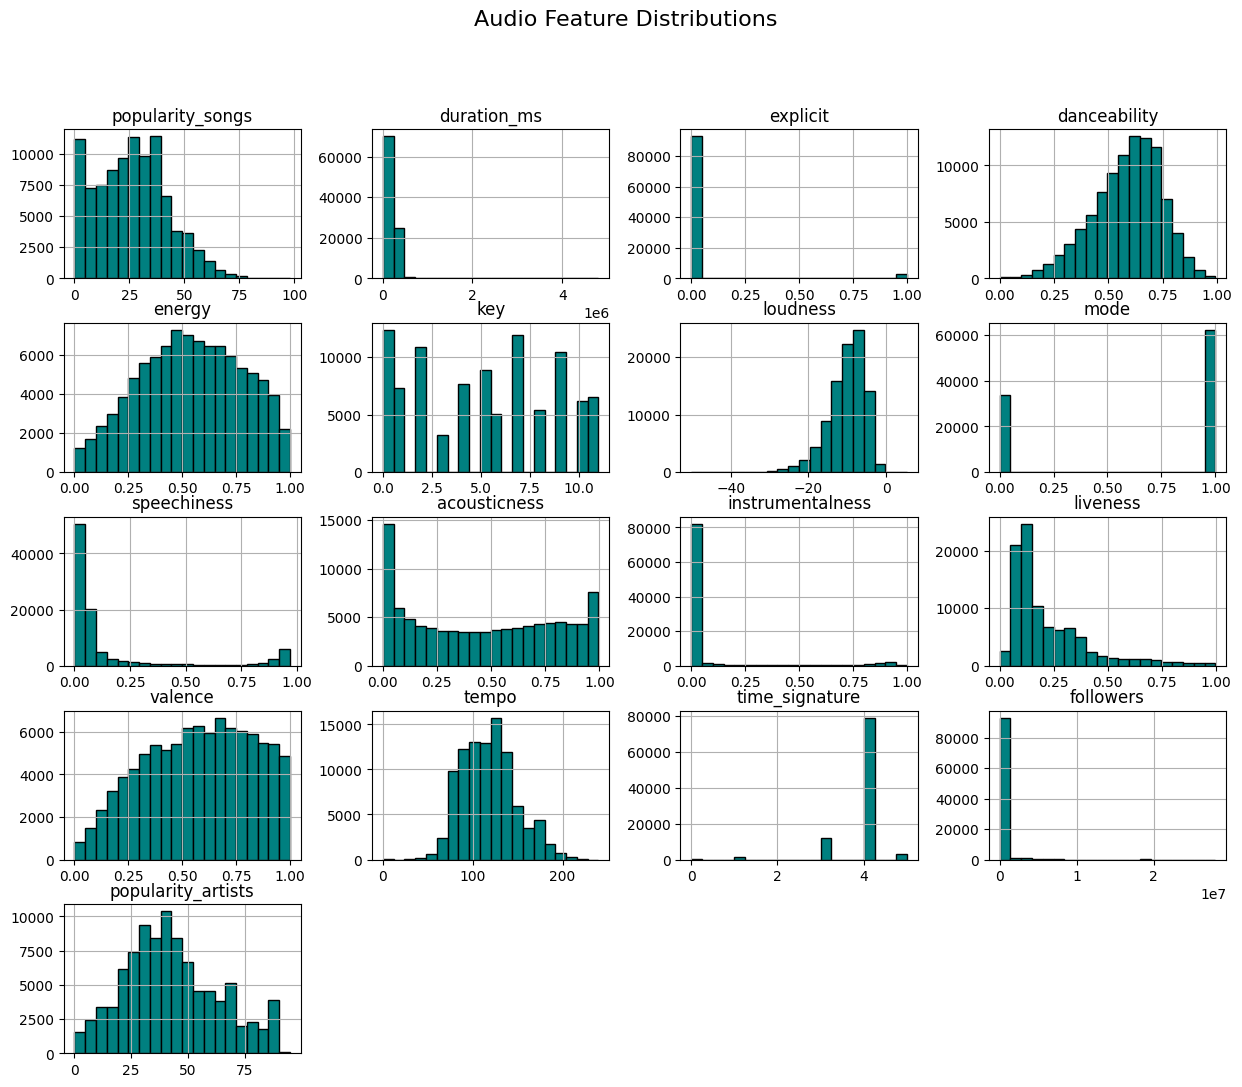

In [55]:
df.hist(bins=20, figsize=(15, 12), color='teal', edgecolor='black')
plt.suptitle('Audio Feature Distributions', fontsize=16)
plt.show()

#   **Feature Selection**

**Select Recommended Audio Features:**
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_ms


In [56]:
recommended_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Extract numerical features into X
X = df[recommended_features]
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,161427
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,223440
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,208267
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,161933
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,167973


In [57]:
df.shape

(95837, 17)

#   **Normalization**
Since clustering is distance-based, we use `StandardScaler` to bring all features to the same scale.

In [58]:

scaler = StandardScaler()

# Transform X into X_scaled
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=recommended_features)

df_scaled.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-0.401735
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,0.124906
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,-0.003949
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,-0.397437
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,-0.346143


#  **2 . Clustering Techniques**

## 🔸 Option A : K-Means Clustering

### Step 1 : Elbow Method (Finding K)
I plot the 'Inertia' (Sum of Squared Errors). We look for the **elbow point** where adding more clusters doesn't provide significant improvement.

In [59]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

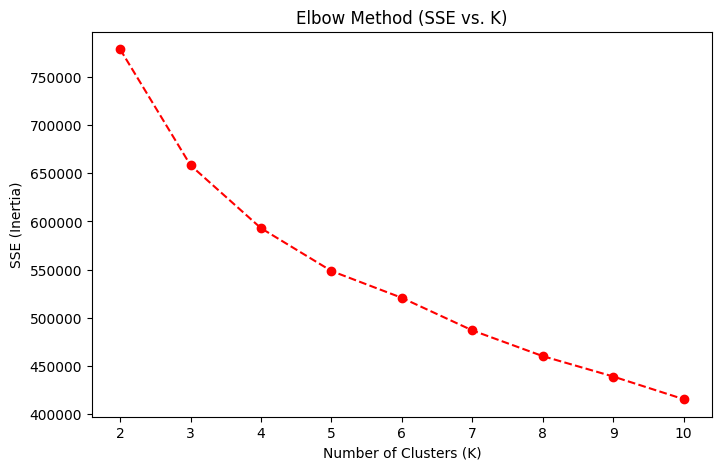

In [60]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='red')
plt.title('Elbow Method (SSE vs. K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.show()

### **Step 2 : Silhouette Score**


In [61]:
sil_scores = []
k_values = range(2, 11)

for k in k_values:
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels, sample_size=1000)
    sil_scores.append(score)
    print("K =", k, "Silhouette =", score)


K = 2 Silhouette = 0.22370693941875333
K = 3 Silhouette = 0.23793275000215336
K = 4 Silhouette = 0.23108913398931033
K = 5 Silhouette = 0.18440642067292862
K = 6 Silhouette = 0.1809774294007156
K = 7 Silhouette = 0.159170359212986
K = 8 Silhouette = 0.17550032598408785
K = 9 Silhouette = 0.1643119191930981
K = 10 Silhouette = 0.16440093163283673


In [62]:
k_optimal = 5

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
df['kmeans_cluster'].value_counts()

kmeans_cluster
0    30373
3    24584
4    21080
2    12273
1     7527
Name: count, dtype: int64

In [63]:
sample_indices = np.random.choice(X_scaled.shape[0], 5000, replace=False)

sil_score = silhouette_score(
    X_scaled[sample_indices],
    df['kmeans_cluster'].iloc[sample_indices])


print(f"Final Silhouette Score for k={k_optimal}: {sil_score:.3f}")

Final Silhouette Score for k=5: 0.190


# Applying K-Means Clustering and Integrating Predicted Labels into the Original Dataset

In [64]:
df.groupby('kmeans_cluster')[recommended_features].mean()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
kmeans_cluster,,,,,,,,,,
0,0.706962,0.671949,-7.986034,0.078149,0.309603,0.021395,0.171255,0.786520,117.845522,213629.943898
1,0.484072,0.400033,-14.207328,0.059369,0.668444,0.817177,0.185157,0.449815,113.510101,227500.961738
2,0.664406,0.466487,-13.387732,0.838939,0.586096,0.000879,0.435634,0.583226,100.176056,96210.790434
3,0.503925,0.313460,-12.634777,0.062285,0.743712,0.018421,0.179605,0.419779,111.125521,220935.668443
4,0.502056,0.711780,-7.072090,0.072693,0.193385,0.028849,0.246591,0.487895,136.128338,246252.002182


In [65]:
# Applying KMeans and adding labels
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
print("K-Means completed!")

K-Means completed!


In [66]:
df[['kmeans_cluster']].head()

,kmeans_cluster
0,3
1,3
2,3
3,3
4,3


In [67]:
df.shape

(95837, 18)

#  **Dimensionality Reduction**

**Goal:**  Reduce the dataset to 2 or 3 components to visualize clusters later.

###  Applying PCA (Principal Component Analysis)

In [68]:
Pca = PCA(n_components=2, random_state=42)
pca_result = Pca.fit_transform(X_scaled)

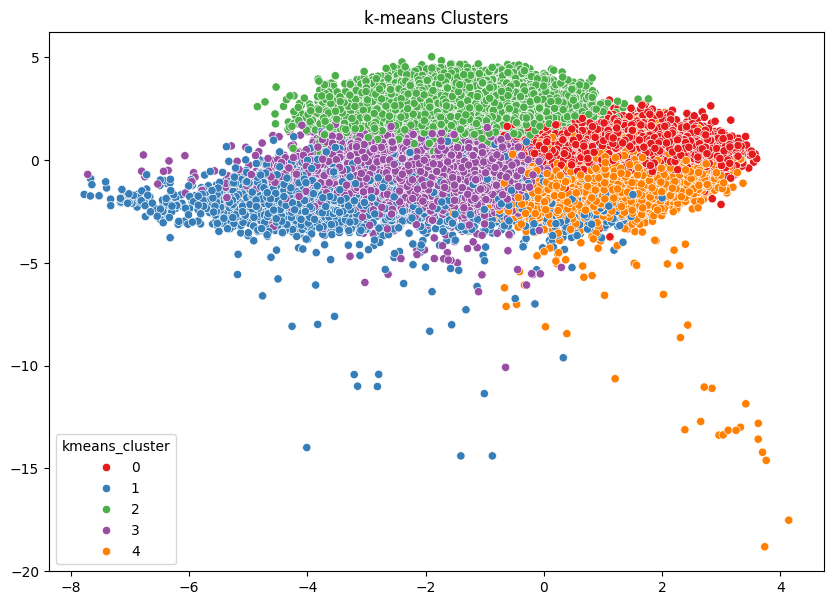

In [69]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['kmeans_cluster'], palette='Set1')
plt.title('k-means Clusters')
plt.show()

# 🔸 Option B: DBSCAN (Tuning & Visualization)

## Good for detecting noise/outliers.

#### Use after tuning parameters eps and min_samples.

In [70]:
# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
df['db_cluster'] = db.fit_predict(X_scaled)

In [71]:
# Count clusters (exclude noise = -1)
labels = df['db_cluster']
n_clusters = len(set(labels)) - (1 if -1 in labels.values else 0)

In [72]:
# Noise points
noise_count = list(labels).count(-1)
noise_percent = (noise_count / len(labels)) * 100

In [73]:
# Output
df['db_cluster'].value_counts()

db_cluster
-1      79954
 3      12372
 133       40
 162       33
 21        31
        ...  
 328        2
 92         2
 419        2
 511        2
 430        2
Name: count, Length: 517, dtype: int64

In [74]:
# Output
print(f"✅ DBSCAN found {n_clusters} clusters.")
print(f"🔇 Noise points detected: {noise_count} ({noise_percent:.1f}% of data)")

✅ DBSCAN found 516 clusters.
🔇 Noise points detected: 79954 (83.4% of data)


# **Visualization**

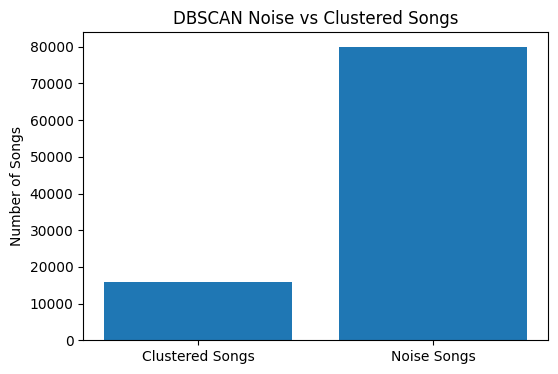

In [75]:
# Count noise vs clustered
noise_count = (df['db_cluster'] == -1).sum()
clustered_count = (df['db_cluster'] != -1).sum()

plt.figure(figsize=(6, 4))
plt.bar(['Clustered Songs', 'Noise Songs'],[clustered_count, noise_count])
plt.title("DBSCAN Noise vs Clustered Songs")
plt.ylabel("Number of Songs")
plt.show()


# 🔸 Option C: Hierarchical Clustering

### Visualizing the hierarchy with a Dendrogram.

In [76]:
#  Create Linkage Matrix using a sample

X_sample_hier = X_scaled[np.random.choice(len(X_scaled), 1000, replace=False)]
linked = linkage(X_sample_hier, method='ward')

print("✅ Linkage matrix created successfully!")

✅ Linkage matrix created successfully!


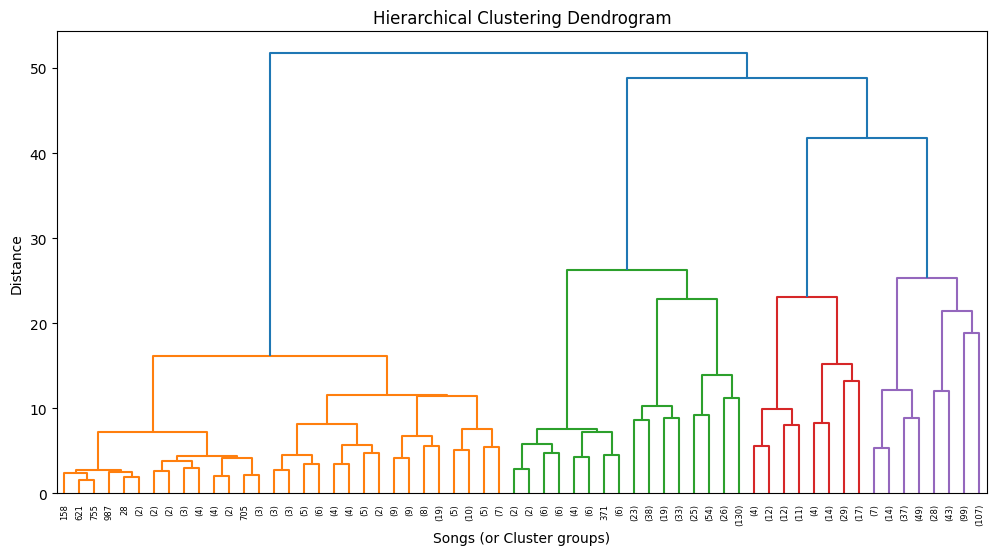

In [77]:
#  Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Songs (or Cluster groups)")
plt.ylabel("Distance")
plt.show()

In [78]:
original_data = pd.read_csv('single_genre_artists.csv')

df['name_song'] = original_data['name_song'].values
df['name_artists'] = original_data['name_artists'].values

In [79]:
df[['name_song', 'name_artists', 'kmeans_cluster', 'db_cluster']].head(10)

,name_song,name_artists,kmeans_cluster,db_cluster
0,La Java,Mistinguett,3,-1
1,En Douce,Mistinguett,3,3
2,J'en Ai Marre,Mistinguett,3,-1
3,Ils n'ont pas ca,Mistinguett,3,-1
4,La belote,Mistinguett,3,-1
5,Oh mademoiselle,Mistinguett,3,-1
6,Il m'a vue nue,Mistinguett,3,-1
7,Mon Bus'ness,Mistinguett,3,-1
8,Ça c'est Paris,Mistinguett,3,-1
9,Le Fado,Mistinguett,3,-1


#  **3 . Cluster Evaluation**

In [80]:
# 1. Inertia

print(f"Inertia: {kmeans.inertia_:.2f}")

Inertia: 548594.92


In [81]:
# 2. Silhouette Score (Sampled for speed)

sample_idx = np.random.choice(X_scaled.shape[0], 10000, replace=False)
sil_score = silhouette_score(X_scaled[sample_idx], kmeans.labels_[sample_idx])
print(f"Silhouette Score (Sampled): {sil_score:.4f}")

Silhouette Score (Sampled): 0.1852


In [82]:
# 3. Davies-Bouldin Index

db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.4f}")

Davies-Bouldin Index: 1.6888


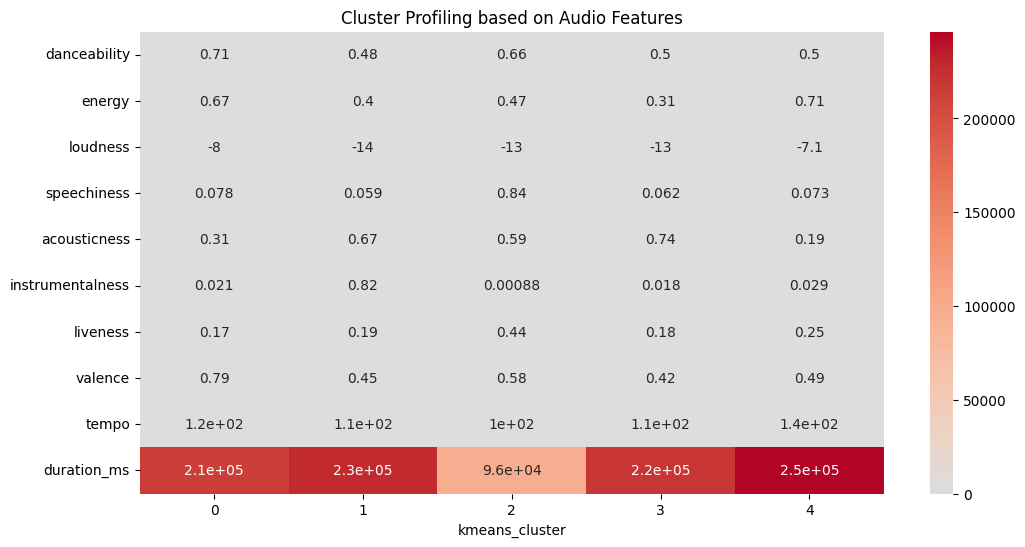

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
kmeans_cluster,,,,,,,,,,
0,0.706962,0.671949,-7.986034,0.078149,0.309603,0.021395,0.171255,0.786520,117.845522,213629.943898
1,0.484072,0.400033,-14.207328,0.059369,0.668444,0.817177,0.185157,0.449815,113.510101,227500.961738
2,0.664406,0.466487,-13.387732,0.838939,0.586096,0.000879,0.435634,0.583226,100.176056,96210.790434
3,0.503925,0.313460,-12.634777,0.062285,0.743712,0.018421,0.179605,0.419779,111.125521,220935.668443
4,0.502056,0.711780,-7.072090,0.072693,0.193385,0.028849,0.246591,0.487895,136.128338,246252.002182


In [ ]:
cluster_profile = df.groupby('kmeans_cluster')[recommended_features].mean()

# Displaying the profile heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile.T, annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Profiling based on Audio Features')
plt.show()

In [86]:
display(cluster_profile)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
kmeans_cluster,,,,,,,,,,
0,0.706962,0.671949,-7.986034,0.078149,0.309603,0.021395,0.171255,0.786520,117.845522,213629.943898
1,0.484072,0.400033,-14.207328,0.059369,0.668444,0.817177,0.185157,0.449815,113.510101,227500.961738
2,0.664406,0.466487,-13.387732,0.838939,0.586096,0.000879,0.435634,0.583226,100.176056,96210.790434
3,0.503925,0.313460,-12.634777,0.062285,0.743712,0.018421,0.179605,0.419779,111.125521,220935.668443
4,0.502056,0.711780,-7.072090,0.072693,0.193385,0.028849,0.246591,0.487895,136.128338,246252.002182


### **Cluster Summary**

- **Cluster 0:** High acousticness and low energy. ➡️ **"Chill Acoustic"** tracks.
- **Cluster 1:** High danceability and high energy. ➡️ **"Party Tracks"**.
- **Cluster 2:** High speechiness and high liveness. ➡️ **"Vocal / Live Performance"**.

In [87]:
df.to_csv('amazon_music_final_clusters.csv', index=False)
print("✅ Final result saved to 'amazon_music_final_clusters.csv'")

✅ Final result saved to 'amazon_music_final_clusters.csv'
